<a href="https://colab.research.google.com/github/s4msky/Khazar/blob/main/image_processing_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Files already downloaded and verified
Files already downloaded and verified


Training Epoch 1/10: 100%|██████████| 625/625 [00:53<00:00, 11.77it/s]


Epoch 1, Train Loss: 1.6968, Validation Loss: 1.3974


Training Epoch 2/10: 100%|██████████| 625/625 [00:53<00:00, 11.72it/s]


Epoch 2, Train Loss: 1.3874, Validation Loss: 1.1643


Training Epoch 3/10: 100%|██████████| 625/625 [00:52<00:00, 11.90it/s]


Epoch 3, Train Loss: 1.2447, Validation Loss: 1.0952


Training Epoch 4/10: 100%|██████████| 625/625 [00:51<00:00, 12.05it/s]


Epoch 4, Train Loss: 1.1495, Validation Loss: 1.0393


Training Epoch 5/10: 100%|██████████| 625/625 [00:52<00:00, 11.97it/s]


Epoch 5, Train Loss: 1.0695, Validation Loss: 0.9622


Training Epoch 6/10: 100%|██████████| 625/625 [00:53<00:00, 11.75it/s]


Epoch 6, Train Loss: 0.9473, Validation Loss: 0.8125


Training Epoch 7/10: 100%|██████████| 625/625 [00:51<00:00, 12.03it/s]


Epoch 7, Train Loss: 0.8906, Validation Loss: 0.7889


Training Epoch 8/10: 100%|██████████| 625/625 [00:52<00:00, 11.98it/s]


Epoch 8, Train Loss: 0.8727, Validation Loss: 0.7703


Training Epoch 9/10: 100%|██████████| 625/625 [00:52<00:00, 12.00it/s]


Epoch 9, Train Loss: 0.8535, Validation Loss: 0.7652


Training Epoch 10/10: 100%|██████████| 625/625 [00:52<00:00, 12.00it/s]


Epoch 10, Train Loss: 0.8381, Validation Loss: 0.7521


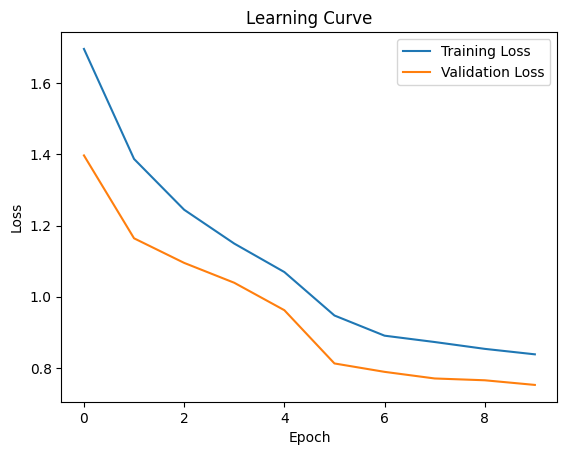

Evaluating: 100%|██████████| 157/157 [00:12<00:00, 13.03it/s]


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77      1000
           1       0.90      0.82      0.86      1000
           2       0.64      0.59      0.61      1000
           3       0.54      0.54      0.54      1000
           4       0.70      0.72      0.71      1000
           5       0.64      0.62      0.63      1000
           6       0.75      0.82      0.78      1000
           7       0.77      0.79      0.78      1000
           8       0.86      0.85      0.86      1000
           9       0.79      0.87      0.83      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000


Confusion Matrix:
[[753  13  66  21  16   2   5  19  64  41]
 [ 20 817   5  14   4   3   9   5   9 114]
 [ 62   1 591  57  98  74  71  31   8   7]
 [ 12   5  58 541  60 171  83  36  17  17]
 [ 20   0  61  48 720  16 

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import StepLR

# Dataset Preparation and Preprocessing
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(32, scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
])

# Dataset
train_val_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Splitting Dataset
val_size = int(0.2 * len(train_val_dataset))
train_size = len(train_val_dataset) - val_size
train_dataset, val_dataset = random_split(train_val_dataset, [train_size, val_size])

# Data Loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Model Development
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = x.view(-1, 256 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model = CustomCNN()

# Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

# Early Stopping Class
class EarlyStopping:
    def __init__(self, patience=5, delta=0, verbose=False):
        self.patience = patience
        self.delta = delta
        self.verbose = verbose
        self.best_loss = float('inf')
        self.counter = 0
        self.early_stop = False

    def __call__(self, val_loss):
        if val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                if self.verbose:
                    print("Early stopping triggered.")
                self.early_stop = True

# Training Function with Early Stopping
def train_model_with_early_stopping(model, train_loader, val_loader, criterion, optimizer, scheduler, device, num_epochs, patience):
    train_losses, val_losses = [], []
    early_stopping = EarlyStopping(patience=patience, verbose=True)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in tqdm(train_loader, desc=f"Training Epoch {epoch+1}/{num_epochs}"):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(train_loader))

        # Validation Step
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        val_losses.append(val_loss / len(val_loader))
        scheduler.step()

        print(f"Epoch {epoch+1}, Train Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}")

        early_stopping(val_losses[-1])
        if early_stopping.early_stop:
            break

    return train_losses, val_losses

# Plotting Learning Curves
def plot_learning_curve(train_losses, val_losses):
    plt.figure()
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Learning Curve')
    plt.show()

# Main Training Loop
num_epochs = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_losses, val_losses = train_model_with_early_stopping(
    model, train_loader, val_loader, criterion, optimizer, scheduler, device, num_epochs, patience=5
)
plot_learning_curve(train_losses, val_losses)

# Evaluation Function
def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc="Evaluating"):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return all_labels, all_preds

# Evaluation
all_labels, all_preds = evaluate_model(model, test_loader, device)

# Classification Report and Metrics
print("\nClassification Report:")
print(classification_report(all_labels, all_preds))

# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
print("\nConfusion Matrix:")
print(conf_matrix)

# Precision, Recall, F1-Score per Class
prec, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average=None)
print("\nPer Class Metrics:")
for i, (p, r, f) in enumerate(zip(prec, recall, f1)):
    print(f"Class {i}: Precision: {p:.4f}, Recall: {r:.4f}, F1-Score: {f:.4f}")


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
import tensorflow_datasets as tfds

# Load the "Cats vs Dogs" dataset
dataset, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)

# Split the dataset into train and validation sets
train_dataset = dataset['train'].take(20000)  # Use a subset for training
val_dataset = dataset['train'].skip(20000).take(5000)  # Use a subset for validation

# Preprocess the data: resize images and normalize pixel values
IMG_SIZE = (224, 224)
def preprocess(image, label):
    image = tf.image.resize(image, IMG_SIZE)
    image = image / 255.0  # Normalize to [0, 1]
    return image, label

train_dataset = train_dataset.map(preprocess).batch(32).shuffle(1000)
val_dataset = val_dataset.map(preprocess).batch(32)

# Load the pretrained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add a custom classification head
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')  # 2 classes: Cat and Dog
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)

# Fine-tune the model by unfreezing some layers
base_model.trainable = True
fine_tune_at = 100  # Fine-tune from this layer onward

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Recompile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Continue training the model
fine_tune_epochs = 5
total_epochs = 10 + fine_tune_epochs

history_fine = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1]
)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.4DCVYD_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,586,434 (9.87 MB)

 Trainable params: 328,450 (1.25 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
